**Stock Prize Prediction using Prophet**


Importing all Ncessary Libraries

---



In [60]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

In [61]:
#Initialize Ploty
import plotly.io as pio
pio.renderers.default = 'colab'

Import csv file

In [62]:
df=pd.read_csv("TSLA.csv")

In [63]:
#Read function from pandas
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-02-01,69.589996,69.589996,68.610001,68.919998,68.919998,152200
1,2024-02-02,68.980003,71.739998,68.980003,69.199997,69.199997,336701
2,2024-02-05,70.000000,70.279999,68.849998,69.459999,69.459999,219127
3,2024-02-06,69.919998,71.699997,69.330002,70.440002,70.440002,294808
4,2024-02-07,71.779999,81.150002,70.169998,78.709999,78.709999,1547163
...,...,...,...,...,...,...,...
97,2024-06-27,54.290001,54.290001,53.400002,53.880001,53.880001,118791
98,2024-06-28,54.200001,54.310001,53.750000,53.919998,53.919998,78178
99,2024-07-01,53.150002,54.180000,53.150002,53.310001,53.310001,186607
100,2024-07-02,53.500000,53.930000,52.799999,52.939999,52.939999,133043


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       102 non-null    object 
 1   Open       102 non-null    float64
 2   High       102 non-null    float64
 3   Low        102 non-null    float64
 4   Close      102 non-null    float64
 5   Adj Close  102 non-null    float64
 6   Volume     102 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.7+ KB


In [65]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,59.322255,60.162843,58.160882,58.949412,58.949412,2.020156e+05
std,5.624106,5.906197,5.125399,5.353759,5.353759,3.307057e+05
min,47.950001,53.000000,47.950001,51.950001,51.950001,1.932200e+04
25%,54.352499,55.210001,53.719999,54.237500,54.237500,7.726375e+04
50%,58.440000,59.825001,57.625000,58.229999,58.229999,1.195835e+05
75%,62.545001,63.582501,61.537499,62.202501,62.202501,1.948742e+05
max,80.220001,82.260002,77.440002,78.709999,78.709999,2.612855e+06


Data Visualization using Ploty- Visualizing the historical performance of data

In [66]:
px.area( df, x="Date", y="Close")

In [67]:
px.line( df, x="Date", y="Close") #line plot

In [68]:
px.area( df, x="Date", y="Volume")

In [69]:
px.bar( df, x="Date", y="Volume")

In [70]:
#Creating Box Plot to analyse price of Tesla in more detailed veiw
px.box( df, y="Close")

Data Preparation

---



In [71]:
#lets look at the data first
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-02-01,69.589996,69.589996,68.610001,68.919998,68.919998,152200
1,2024-02-02,68.980003,71.739998,68.980003,69.199997,69.199997,336701
2,2024-02-05,70.000000,70.279999,68.849998,69.459999,69.459999,219127
3,2024-02-06,69.919998,71.699997,69.330002,70.440002,70.440002,294808
4,2024-02-07,71.779999,81.150002,70.169998,78.709999,78.709999,1547163
...,...,...,...,...,...,...,...
97,2024-06-27,54.290001,54.290001,53.400002,53.880001,53.880001,118791
98,2024-06-28,54.200001,54.310001,53.750000,53.919998,53.919998,78178
99,2024-07-01,53.150002,54.180000,53.150002,53.310001,53.310001,186607
100,2024-07-02,53.500000,53.930000,52.799999,52.939999,52.939999,133043


Creating Prophet Model

In [72]:
#lets create new dataframe only with two columns that are needed- date and close
df_prophet=df[["Date","Close"]]

In [73]:
df_prophet

,Date,Close
0,2024-02-01,68.919998
1,2024-02-02,69.199997
2,2024-02-05,69.459999
3,2024-02-06,70.440002
4,2024-02-07,78.709999
...,...,...
97,2024-06-27,53.880001
98,2024-06-28,53.919998
99,2024-07-01,53.310001
100,2024-07-02,52.939999


In [74]:
#rename columns date to ds and close to y
df_prophet.rename(columns={"Date":"ds","Close":"y"},inplace=True)

<ipython-input-74-8976f87581f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
df_prophet

,ds,y
0,2024-02-01,68.919998
1,2024-02-02,69.199997
2,2024-02-05,69.459999
3,2024-02-06,70.440002
4,2024-02-07,78.709999
...,...,...
97,2024-06-27,53.880001
98,2024-06-28,53.919998
99,2024-07-01,53.310001
100,2024-07-02,52.939999


Creating Prophet Model

In [76]:
m=Prophet()
m.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgquca47l/w4o_3pfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgquca47l/sp_1xf0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79292', 'data', 'file=/tmp/tmpgquca47l/w4o_3pfs.json', 'init=/tmp/tmpgquca47l/sp_1xf0b.json', 'output', 'file=/tmp/tmpgquca47l/prophet_model7hzusk4i/prophet_model-20240703085606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:56:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:56:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting

---



In [94]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [78]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-02-01,69.735721,66.915094,73.331909,69.735721,69.735721,0.389424,0.389424,0.389424,0.389424,0.389424,0.389424,0.0,0.0,0.0,70.125145
1,2024-02-02,69.477562,66.680052,72.871358,69.477562,69.477562,0.190551,0.190551,0.190551,0.190551,0.190551,0.190551,0.0,0.0,0.0,69.668113
2,2024-02-05,68.703085,65.936372,72.120211,68.703085,68.703085,0.305060,0.305060,0.305060,0.305060,0.305060,0.305060,0.0,0.0,0.0,69.008145
3,2024-02-06,68.444926,65.245745,71.690412,68.444926,68.444926,-0.108278,-0.108278,-0.108278,-0.108278,-0.108278,-0.108278,0.0,0.0,0.0,68.336648
4,2024-02-07,68.186767,65.019945,71.505280,68.186767,68.186767,0.186124,0.186124,0.186124,0.186124,0.186124,0.186124,0.0,0.0,0.0,68.372891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2024-07-29,49.324949,46.328085,53.109242,48.512291,50.223936,0.305060,0.305060,0.305060,0.305060,0.305060,0.305060,0.0,0.0,0.0,49.630008
128,2024-07-30,49.228649,45.690778,52.429420,48.365413,50.172153,-0.108278,-0.108278,-0.108278,-0.108278,-0.108278,-0.108278,0.0,0.0,0.0,49.120371
129,2024-07-31,49.132349,45.825276,52.834427,48.225049,50.131648,0.186124,0.186124,0.186124,0.186124,0.186124,0.186124,0.0,0.0,0.0,49.318473
130,2024-08-01,49.036049,46.118521,52.815914,48.077300,50.085548,0.389424,0.389424,0.389424,0.389424,0.389424,0.389424,0.0,0.0,0.0,49.425473


In [93]:
px.line(forecast,x="ds",y=["yhat"])

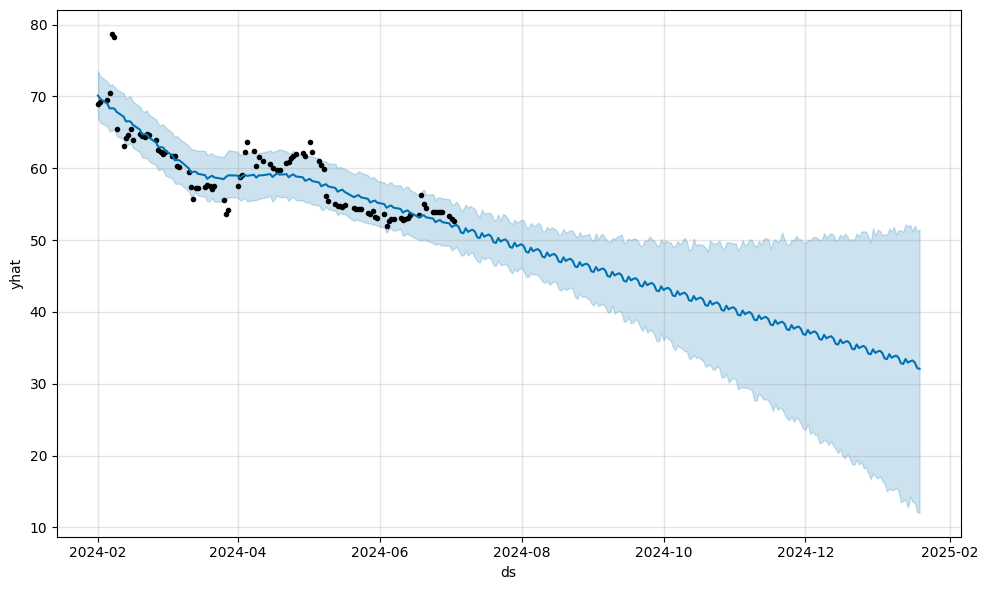

In [88]:
figure=m.plot(forecast, xlabel="ds",ylabel="yhat")

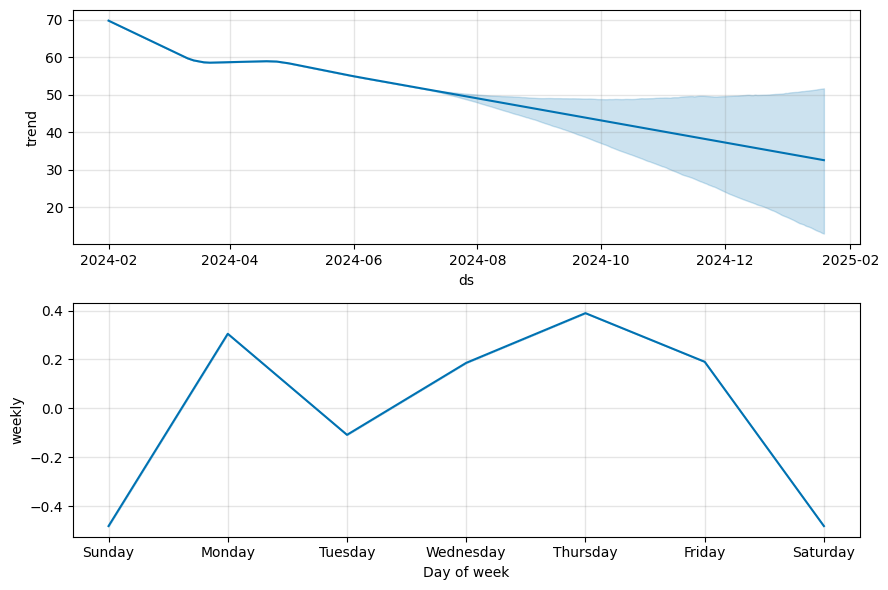

In [89]:
figure2=m.plot_components(forecast)

Download the Forecast Data

In [82]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>